# 「深層学習」読書会　〜第7章〜

<p style="text-align:center;font-size:150%;line-height:150%">2016/07/02 機械学習 名古屋 第5回勉強会</p>

## 第7章 再帰型ニューラルネット

abstract:

+ RNN（再帰型ニューラルネットワーク）
    + 以下のようなデータの特徴をうまく取り扱うNN：
        + データの長さがサンプルごとにまちまち
        + 系列内の要素の並び（＝コンテキスト）に意味がある
    + 例：音声・言語・動画
+ LSTM（長・短期記憶）
    + より長期のコンテキストをモデル化可能
+ CTC（コネクショニスト時系列分類法）
    + 入力系列とは長さの異なる系列を推定（出力）

### 7.1 系列データの分類

**系列データ**：

+ 個々の要素の順序付き集まりデータ

$$
{\bf x}^1, {\bf x}^2, {\bf x}^3, \dots , {\bf x}^T
$$

+ 音声・動画・テキストなど
+ 系列の長さ $T$ は、一般に可変
+ インデックス $t = 1, 2, 3, \dots$ を **時刻**と呼ぶ（*時間*とは言ってない）。

**RNN（再帰型ニューラルネット）**：
コンテキストを学習し、分類出来る。

**コンテキスト（文脈）**：系列内の要素の並び、依存関係

要素の例：

+ 文章中の「単語」
+ 音声信号中の「音素」

### 7.2 RNNの構造

**RNN（再帰型ニューラルネット）**：

+ 内部に（有向）閉路を持つNNの総称
+ 特徴：
    + 情報を一時的に記憶
    + 振る舞いを動的に変化

In [1]:
from graphviz import Digraph

In [ ]:
# fig_7_3_a = Digraph("fig_7_3_a", format="svg")
# 《編集中》

In [ ]:
# fig_7_3_a

In [ ]:
# fig_7_3_b = Digraph("fig_7_3_b", format="svg")
# 《編集中》

In [ ]:
# fig_7_3_b

In [ ]:
# fig_7_4 = Digraph("fig_7_4", format="svg")
# 《編集中》

In [ ]:
# fig_7_4

誤差関数：（順伝播ネットワークと同様）

$$
E({\bf w}) = - \sum_n \sum_t \sum_k d^t_{nk} \log y^t_k({\bf x}_n; {\bf w})
$$

ただし $d^t_n$：$n$ 番目のサンプル ${\bf x}_n$ に対する、時刻 $t$ での目標出力  
（$(d^t_{n1}, d^t_{n2}, \dots , d^t_{nk})$ というベクトル）

**双方向RNN**：  
データを 順方向 逆方向 両方の入力で与えるRNNを統合したもの。

+ データの数が有限ならば有効
+ オンライン学習には不向き

### 7.3 順伝播計算

《略》

### 7.4 逆伝播計算

《略》

### 7.5 長・短期記憶（LSTM）

#### 7.5.1 RNN の勾配消失問題

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
%config InlineBackend.figure_formats = {'svg',}


In [4]:
def gradient_vanishing_image():
    x_linspace = tf.constant(np.linspace(-5.0, 5.0))
    grad1 = tf.sigmoid(x_linspace)
    grad2 = tf.sigmoid(grad1)
    grad3 = tf.sigmoid(grad2)
    
    with tf.Session() as sess:
        x, y1, y2, y3 = sess.run([x_linspace, grad1, grad2, grad3])
        plt.plot(x, y1, "b")
        plt.plot(x, y2, "g")
        plt.plot(x, y3, "r")

※イメージ

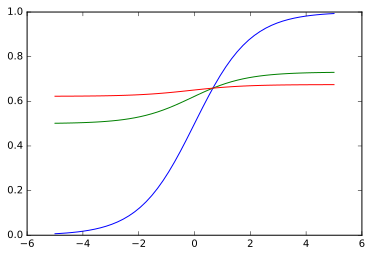

In [5]:
gradient_vanishing_image()

#### 7.5.2 LSTM の概要

**LSTM（長・短期記憶）**：  
RNNの拡張モデル（の1つ）。  
RNNの中間層の各ユニットをメモリユニットと呼ぶ要素で置き換えた構造を持つ。

#### 7.5.3 順伝播計算

《略》

#### 7.5.4 逆伝播計算

《略》

### 7.6 入出力間で系列長が異なる場合

#### 7.6.1 隠れマルコフモデル

#### 7.6.2 コネクショニスト時系列分類法

《略》